# VAR model
## Anomaly Detection in Time Series
### References 
* SUNILKUMAR. Predictive Maintenance of Pumps: Leveraging Machine Learning for Maintenance. Medium, 11 oct. 2021.

* RAJAN, Srivignesh. Multivariate Time Series Anomaly Detection using VAR model. 10 aug. 2021. 

In [1]:
import pandas as pd
from numpy import where, random, array, quantile, mean
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

### Preprocessing
Read the dataset from Kaggle

In [2]:
df = pd.read_csv('sensor.csv', parse_dates=['timestamp'], index_col = 'timestamp').drop(columns=['Unnamed: 0'])

In [3]:
df

sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
timestamp                                                                     
2018-04-01 00:00:00   2.465394   47.09201  53.211800  46.310760  634.375000   
2018-04-01 00:01:00   2.465394   47.09201  53.211800  46.310760  634.375000   
2018-04-01 00:02:00   2.444734   47.35243  53.211800  46.397570  638.888900   
2018-04-01 00:03:00   2.460474   47.09201  53.168400  46.397568  628.125000   
2018-04-01 00:04:00   2.445718   47.13541  53.211800  46.397568  636.458300   
...                        ...        ...        ...        ...         ...   
2018-08-31 23:55:00   2.407350   47.69965  50.520830  43.142361  634.722229   
2018-08-31 23:56:00   2.400463   47.69965  50.564240  43.142361  630.902771   
2018-08-31 23:57:00   2.396528   47.69965  50.520830  43.142361  625.925903   
2018-08-31 23:58:00   2.406366   47.69965  50.520832  43.142361  635.648100   
2018-08-31 23:59:00   2.396528   47.69965  50.520832  43.142361  639.814800   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00   64.59095   15.11863   16.65220   15.65393   15.16204   
2018-08-31 23:56:00   65.83363   15.15480   16.70284   15.65393   15.11863   
2018-08-31 23:57:00   67.29445   15.08970   16.70284   15.69734   15.11863   
2018-08-31 23:58:00   65.09175   15.11863   16.56539   15.74074   15.11863   
2018-08-31 23:59:00   65.45634   15.11863   16.65220   15.65393   15.01013   

                     ...  sensor_43  sensor_44  sensor_45  sensor_46  \
timestamp            ...                                               
2018-04-01 00:00:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:01:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:02:00  ...   41.66666  39.351852   65.39352   51.21528   
2018-04-01 00:03:00  ...   40.88541  39.062500   64.81481   51.21528   
2018-04-01 00:04:00  ...   41.40625  38.773150   65.10416   51.79398   
...                  ...        ...        ...        ...        ...   
2018-08-31 23:55:00  ...   38.28125  68.287030   52.37268   48.32176   
2018-08-31 23:56:00  ...   38.28125  66.840280   50.63657   48.03241   
2018-08-31 23:57:00  ...   39.06250  65.393520   48.90046   48.03241   
2018-08-31 23:58:00  ...   40.62500  64.236110   47.74306   48.32176   
2018-08-31 23:59:00  ...   41.40625  62.789350   46.29630   48.90046   

                     sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
timestamp                                                                    
2018-04-01 00:00:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:01:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:02:00  38.194443   155.9606   67.12963   241.3194   203.7037   
2018-04-01 00:03:00  38.194440   155.9606   66.84028   240.4514   203.1250   
2018-04-01 00:04:00  38.773150   158.2755   66.55093   242.1875   201.3889   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00  41.087960   212.3843  153.64580        NaN   231.1921   
2018-08-31 23:56:00  40.798610   213.8310  156.25000        NaN   231.1921   
2018-08-31 23:57:00  40.798610   217.3032  155.38190        NaN   232.0602   
2018-08-31 23:58:00  40.509258   222.5116  153.93520        NaN   234.0856   
2018-08-31 23:59:00  40.219910   227.4306  150.46300        NaN   234.0856   

                     machi

Sum all null values per sensor to see if there are too many missing values

In [4]:
df.isnull().sum()

sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
sensor_38             27
sensor_39             27


Fill NaN values using an interpolation method

In [5]:
df = df.interpolate().resample('120min').mean()

In [6]:
df

sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
timestamp                                                                     
2018-04-01 00:00:00   2.454375  48.285950  53.124636  46.080366  634.178257   
2018-04-01 02:00:00   2.454096  48.823783  52.993344  45.405814  633.922030   
2018-04-01 04:00:00   2.453850  47.774160  52.839986  45.249926  634.333513   
2018-04-01 06:00:00   2.454293  47.073566  52.595122  45.012657  633.749027   
2018-04-01 08:00:00   2.453859  46.467374  52.370514  44.688584  635.079078   
...                        ...        ...        ...        ...         ...   
2018-08-31 14:00:00   2.408727  49.931278  52.721352  45.072698  631.766100   
2018-08-31 16:00:00   2.402791  50.811268  51.918763  44.438656  632.070784   
2018-08-31 18:00:00   2.402545  49.718784  51.107853  43.476922  631.801178   
2018-08-31 20:00:00   2.402660  48.555048  50.725549  43.420860  631.993052   
2018-08-31 22:00:00   2.402652  47.731842  50.564236  43.047597  632.041613   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00  75.151163  13.478430  16.159394  15.707647  15.089459   
2018-04-01 02:00:00  74.136627  13.600500  16.160057  15.678229  15.091870   
2018-04-01 04:00:00  72.057675  13.594050  16.157284  15.700533  15.093256   
2018-04-01 06:00:00  74.168254  13.594653  16.159273  15.660687  15.086806   
2018-04-01 08:00:00  73.559189  13.348221  16.162348  15.677385  15.087711   
...                        ...        ...        ...        ...        ...   
2018-08-31 14:00:00  69.829906  15.109351  17.072543  16.087360  15.355720   
2018-08-31 16:00:00  76.638475  15.112003  17.166341  16.189235  15.357650   
2018-08-31 18:00:00  77.016860  15.117488  16.870239  15.861032  15.204565   
2018-08-31 20:00:00  66.838866  15.106578  16.664197  15.676421  15.089519   
2018-08-31 22:00:00  70.826482  15.110857  16.656541  15.675094  15.091990   

                     ...  sensor_42  sensor_43  sensor_44  sensor_45  \
timestamp            ...                                               
2018-04-01 00:00:00  ...  32.497827  40.108503  40.996334  48.693094   
2018-04-01 02:00:00  ...  31.794703  39.782983  46.522955  52.324460   
2018-04-01 04:00:00  ...  31.080728  38.637150  55.579668  65.883005   
2018-04-01 06:00:00  ...  31.171873  38.723955  55.389178  52.300348   
2018-04-01 08:00:00  ...  31.968314  41.319442  54.108796  55.386767   
...                  ...        ...        ...        ...        ...   
2018-08-31 14:00:00  ...  37.413191  46.924910  65.338059  66.659432   
2018-08-31 16:00:00  ...  36.462671  41.612410  74.288675  66.567804   
2018-08-31 18:00:00  ...  31.464842  39.279511  75.198929  54.870756   
2018-08-31 20:00:00  ...  30.507812  41.065535  60.035686  69.748264   
2018-08-31 22:00:00  ...  29.717882  42.966576  59.587191  43.545042   

                     sensor_46  sensor_47   sensor_48   sensor_49  \
timestamp                                                           
2018-04-01 00:00:00  45.500579  39.308448  189.072146   75.776429   
2018-04-01 02:00:00  47.002798  38.406635  189.002220   90.244020   
2018-04-01 04:00:00  54.082272  38.937114  198.791955  102.688560   
2018-04-01 06:00:00  42.100694  39.209587  221.428917  107.183159   
2018-04-01 08:00:00  44.369695  39.344617  203.927947  111.675347   
...                        ...        ...         ...         ...   
2018-08-31 14:00:00  62.647087  49.469522  297.907017  110.619213   
2018-08-31 16:00:00  55.963059  45.011091  216.956018  101.287617   
2018-08-31 18:00:00  49.643133  42.127219  244.313029  109.002456   
2018-08-31 20:00:00  67.672164  47.832270  328.363714  118.718651   
2018-08-31 22:00:00  47.234279  38.560956  249.035494  118.995953   

                       sensor_50   sensor_51  
timestamp                                     
2018-04-01 00:00:00   235.240650  206.884158  
20

Dismiss the sensor_15 because it has a lot of missing values

In [7]:
df.isnull().sum()

sensor_00       0
sensor_01       0
sensor_02       0
sensor_03       0
sensor_04       0
sensor_05       0
sensor_06       0
sensor_07       0
sensor_08       0
sensor_09       0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15    1836
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
sensor_22       0
sensor_23       0
sensor_24       0
sensor_25       0
sensor_26       0
sensor_27       0
sensor_28       0
sensor_29       0
sensor_30       0
sensor_31       0
sensor_32       0
sensor_33       0
sensor_34       0
sensor_35       0
sensor_36       0
sensor_37       0
sensor_38       0
sensor_39       0
sensor_40       0
sensor_41       0
sensor_42       0
sensor_43       0
sensor_44       0
sensor_45       0
sensor_46       0
sensor_47       0
sensor_48       0
sensor_49       0
sensor_50       0
sensor_51       0
dtype: int64

In [8]:
df = df.drop(columns=['sensor_15'])

### Applying the Model
Conduct an ADF test to check whether the data is stationary or not

In [9]:
def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

In [10]:
adf_test_results = {
    col: test_stationarity(df, col)
    for col in df.columns
}
adf_test_results

{'sensor_00': 'Stationary',
 'sensor_01': 'Stationary',
 'sensor_02': 'Stationary',
 'sensor_03': 'Stationary',
 'sensor_04': 'Stationary',
 'sensor_05': 'Stationary',
 'sensor_06': 'Stationary',
 'sensor_07': 'Stationary',
 'sensor_08': 'Stationary',
 'sensor_09': 'Stationary',
 'sensor_10': 'Stationary',
 'sensor_11': 'Stationary',
 'sensor_12': 'Stationary',
 'sensor_13': 'Stationary',
 'sensor_14': 'Stationary',
 'sensor_16': 'Stationary',
 'sensor_17': 'Stationary',
 'sensor_18': 'Stationary',
 'sensor_19': 'Stationary',
 'sensor_20': 'Stationary',
 'sensor_21': 'Stationary',
 'sensor_22': 'Stationary',
 'sensor_23': 'Stationary',
 'sensor_24': 'Stationary',
 'sensor_25': 'Stationary',
 'sensor_26': 'Stationary',
 'sensor_27': 'Stationary',
 'sensor_28': 'Stationary',
 'sensor_29': 'Stationary',
 'sensor_30': 'Stationary',
 'sensor_31': 'Stationary',
 'sensor_32': 'Stationary',
 'sensor_33': 'Stationary',
 'sensor_34': 'Non-Stationary',
 'sensor_35': 'Non-Stationary',
 'sensor_36'

If the data is not stationary convert the data into stationary data

Use differencing to transform the data into stationary data

In [11]:
def differencing(data, column, order):
    differenced_data = data[column].diff(order)
    differenced_data.fillna(differenced_data.mean(), inplace=True)
    return differenced_data

In [12]:
for col in df.columns:
    df[col] = differencing(df, col, 1)

Check if the data is now only stationary 

In [13]:
adf_test_results = {
    col: test_stationarity(df, col)
    for col in df.columns
}
adf_test_results

{'sensor_00': 'Stationary',
 'sensor_01': 'Stationary',
 'sensor_02': 'Stationary',
 'sensor_03': 'Stationary',
 'sensor_04': 'Stationary',
 'sensor_05': 'Stationary',
 'sensor_06': 'Stationary',
 'sensor_07': 'Stationary',
 'sensor_08': 'Stationary',
 'sensor_09': 'Stationary',
 'sensor_10': 'Stationary',
 'sensor_11': 'Stationary',
 'sensor_12': 'Stationary',
 'sensor_13': 'Stationary',
 'sensor_14': 'Stationary',
 'sensor_16': 'Stationary',
 'sensor_17': 'Stationary',
 'sensor_18': 'Stationary',
 'sensor_19': 'Stationary',
 'sensor_20': 'Stationary',
 'sensor_21': 'Stationary',
 'sensor_22': 'Stationary',
 'sensor_23': 'Stationary',
 'sensor_24': 'Stationary',
 'sensor_25': 'Stationary',
 'sensor_26': 'Stationary',
 'sensor_27': 'Stationary',
 'sensor_28': 'Stationary',
 'sensor_29': 'Stationary',
 'sensor_30': 'Stationary',
 'sensor_31': 'Stationary',
 'sensor_32': 'Stationary',
 'sensor_33': 'Stationary',
 'sensor_34': 'Stationary',
 'sensor_35': 'Stationary',
 'sensor_36': 'Stati

Find the best lag for the VAR model

In [14]:
max_lag = 20
var_model = VAR(df)
# select the best lag order
lag_results = var_model.select_order(max_lag)
selected_lag = lag_results.aic
print(selected_lag)

20


Fit the VAR model and find the squared errors of the data for each observation 

Find a threshold for those squared errors

In [29]:
def find_anomalies(squared_errors):
    threshold = np.mean(squared_errors) + np.std(squared_errors)
    predictions = (squared_errors >= threshold).astype(int)
    return predictions, threshold

In [30]:
var = VAR(df)
var_fitresults = var.fit(selected_lag)
squared_errors = var_fitresults.resid.sum(axis=1) ** 2
predictions, threshold = find_anomalies(squared_errors) 

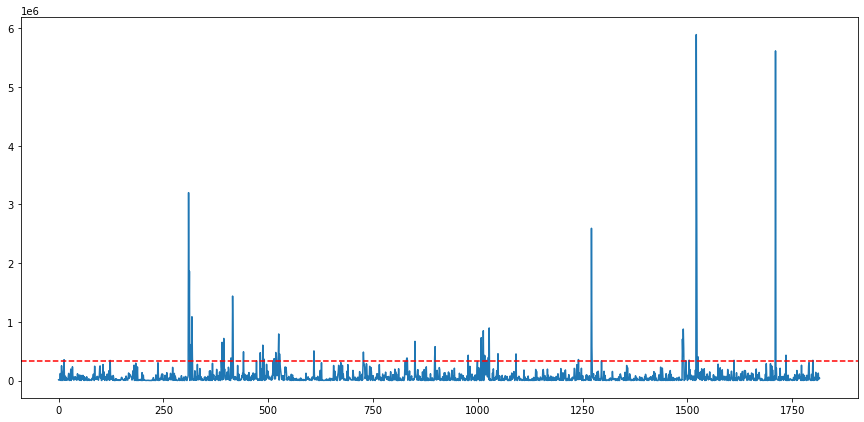

In [46]:
from matplotlib.pyplot import figure
figure(figsize=(15,7))
plt.plot(range(0,len(squared_errors)),squared_errors)
plt.axhline(threshold, c='red', linestyle='--')
plt.show()

Any observation’s squared error exceeding the threshold can be marked as an anomaly

In [17]:
data = df.iloc[selected_lag:, :].copy()
data['Predictions'] = predictions.values
data

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
timestamp                                                                    
2018-04-02 16:00:00  -0.090837   0.563514   0.237993   0.353371 -14.647125   
2018-04-02 18:00:00   0.014585  -1.626157  -0.566768  -1.620731   2.621028   
2018-04-02 20:00:00   0.006198  -0.156612  -0.668765  -1.240596   6.540520   
2018-04-02 22:00:00   0.011986  -0.706742  -0.164569   0.376880  -0.668688   
2018-04-03 00:00:00   0.007985  -1.022859  -0.535302  -0.255352   2.203026   
...                        ...        ...        ...        ...        ...   
2018-08-31 14:00:00  -0.015200  -0.677444   0.616680   0.013744   1.584538   
2018-08-31 16:00:00  -0.005935   0.879991  -0.802589  -0.634042   0.304684   
2018-08-31 18:00:00  -0.000246  -1.092484  -0.810910  -0.961734  -0.269606   
2018-08-31 20:00:00   0.000115  -1.163737  -0.382304  -0.056062   0.191873   
2018-08-31 22:00:00  -0.000008  -0.823206  -0.161314  -0.373263   0.048561   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-02 16:00:00   3.264245  -0.014226  -0.005064  -0.073665   0.074568   
2018-04-02 18:00:00   2.362024   0.012056  -0.005968  -0.178554  -0.076436   
2018-04-02 20:00:00   1.625470   0.199651  -0.004400   0.214603  -0.000783   
2018-04-02 22:00:00  -0.190870   0.041775   0.001566   0.043161  -0.005788   
2018-04-03 00:00:00  -6.404541   0.237268   0.004159   0.267711   0.007354   
...                        ...        ...        ...        ...        ...   
2018-08-31 14:00:00  -7.586440   0.002412   0.161616   0.145699  -0.003859   
2018-08-31 16:00:00   6.808570   0.002652   0.093799   0.101875   0.001929   
2018-08-31 18:00:00   0.378384   0.005485  -0.296103  -0.328203  -0.153084   
2018-08-31 20:00:00 -10.177994  -0.010910  -0.206042  -0.184612  -0.115047   
2018-08-31 22:00:00   3.987617   0.004280  -0.007656  -0.001326   0.002472   

                     ...  sensor_43  sensor_44  sensor_45  sensor_46  \
timestamp            ...                                               
2018-04-02 16:00:00  ...   6.560330   2.879052   1.075426   0.306230   
2018-04-02 18:00:00  ...  -7.543402  -8.868635   3.735048  -2.092978   
2018-04-02 20:00:00  ...  -3.170573   1.422647   0.894579  10.337097   
2018-04-02 22:00:00  ...  -2.452257   2.596933  28.662713   7.238617   
2018-04-03 00:00:00  ...  -3.539496   1.183932 -57.853493 -36.798322   
...                  ...        ...        ...        ...        ...   
2018-08-31 14:00:00  ...   4.661459 -33.750484  -7.325425  -1.960359   
2018-08-31 16:00:00  ...  -5.312500   8.950615  -0.091628  -6.684027   
2018-08-31 18:00:00  ...  -2.332900   0.910254 -11.697048  -6.319927   
2018-08-31 20:00:00  ...   1.786024 -15.163243  14.877507  18.029031   
2018-08-31 22:00:00  ...   1.901042  -0.448495 -26.203222 -20.437885   

                     sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
timestamp                                                                    
2018-04-02 16:00:00  -1.277971  31.018520  12.273339  20.570504  -0.091624   
2018-04-02 18:00:00  -4.832176  13.910594  -0.462962   9.729452   4.762240   
2018-04-02 20:00:00   1.502218  15.080051  -8.241706  11.099057  -6.652676   
2018-04-02 22:00:00  -1.815683   4.648922   8.328511  -0.233892  13.158272   
2018-04-03 00:00:00  -1.880787  -5.519386  -1.007909 -37.591630  -1.750581   
...                        ...        ...        ...        ...        ...   
2018-08-31 14:00:00  -0.077160 -23.186735 -79.928624   0.000000 -23.015527   
2018-08-31 16:00:00  -4.458430 -80.950998  -9.331596   0.000000 -35.067037   
2018-08-31 18:00:00  -2.883873  27.357011   7.714838   0.000000  21.046731   
2018-08-31 20:00:00   5.705052  84.050685   9.716195   0.000000  27.082125   
2018-08-31 22:00:00  -9.271314 -79.328220   0.277301   0.000000 -20.816452   

                     Predictions  
time

### Results
The model has predicted 64 anomalies in the provided data

In [18]:
data['Predictions'].value_counts()

0    1752
1      64
Name: Predictions, dtype: int64

In [19]:
anomalies = data.copy()
anomalies = anomalies.reset_index()
anomalies = anomalies[anomalies['Predictions'] == 1]
anomalies

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
13   2018-04-03 18:00:00   0.011658   0.429326  -0.375435   0.118272   
123  2018-04-12 22:00:00  -2.256851  -5.504558  -1.571094  -0.141058   
310  2018-04-28 12:00:00   0.000213   0.370010   0.223888   0.039063   
311  2018-04-28 14:00:00  -0.000180   0.126591   0.465495   0.411965   
312  2018-04-28 16:00:00   0.000033  -0.099465   0.381584   0.373987   
...                  ...        ...        ...        ...        ...   
1525 2018-08-07 18:00:00   0.000197  -0.790653  -0.582320  -0.407986   
1611 2018-08-14 22:00:00  -0.000016  -0.277777  -0.934246  -0.572917   
1710 2018-08-23 04:00:00  -0.000131   0.372902   0.493344   0.570746   
1735 2018-08-25 06:00:00   0.022480   0.230398   0.194591   0.489729   
1799 2018-08-30 14:00:00   0.000287  -0.728804   0.272712  -0.384838   

       sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  \
13      1.177663  -0.160997  -0.022907   0.231242   0.006811  ...  -2.630208   
123  -553.872014 -73.228497  -9.984084 -14.691418 -14.463735  ... -10.709634   
310    -0.083982   2.872118  -0.003557  -0.000904  -0.042619  ...  -1.662326   
311    -0.484592  -1.245809   0.074267   0.081320   0.022786  ...   2.597656   
312     0.692225  -0.208043   0.175780   0.181450  -0.005847  ...   2.126735   
...          ...        ...        ...        ...        ...  ...        ...   
1525   -1.169637  -2.539658  -0.104105  -0.357592  -0.158360  ...  -3.695747   
1611   -0.231822   1.542487   0.241369   0.000905  -0.070409  ...  -5.677083   
1710    0.660808  -1.347545   0.004220  -0.199352  -0.011273  ...   0.499132   
1735    7.384934   3.998859   0.109230   0.441320   0.151367  ...  -1.516926   
1799   -6.165315   2.413890   0.406901   0.002170  -0.050395  ...  -2.161458   

      sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
13    -0.771606   3.175637  -1.140529  -2.577642  25.528064   7.771508   
123   -9.302662  -2.338928  -9.584780   0.002411 -53.824273  15.786549   
310   -0.301407   1.017553  -1.024787  -0.103684  -6.903457   7.661164   
311    1.830150   1.150174   1.359953   1.798804   8.333336  -2.624029   
312    0.313465   0.241127   3.117766   2.623457 -11.670526  -1.275560   
...         ...        ...        ...        ...        ...        ...   
1525 -25.605228  -3.870082  -4.938271 -26.292438 -35.303338 -15.489970   
1611   3.464988   3.460166   6.556230  -0.945216   8.704667   1.171875   
1710   2.481192  -7.773920  -0.487075  -0.470197  67.370757  31.587577   
1735   0.065105   2.838060  -2.184606   0.089217  20.847803  27.138794   
1799  10.240645   6.835937   0.274884   4.000290 -32.156633   9.481096   

      sensor_50  sensor_51  Predictions  
13     1.073013  17.966339            1  
123  -50.048225 -88.864772            1  
310  -16.724535  24.216335            1  
311   15.564713  -5.242094            1  
312   -4.612748  -5.386766            1  
...         ...        ...          ...  
1525   0.000000 -42.585360            1  
1611   0.000000  -0.183260            1  
1710   0.000000  22.740642            1  
1735   0.000000  27.445028            1  
1799   0.000000   5.121526            1  

[64 rows x 53 columns]